In [5]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Iteratively read files
import glob
import os


from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# For displaying images in ipython
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [4]:
df = pd.read_csv("scraping.csv")
df.head()

name  \
0  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

                                          categories  reviews.rating  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...             5.0   
1  Electronics,iPad & Tablets,All Tablets,Fire Ta...             5.0   
2  Electronics,iPad & Tablets,All Tablets,Fire Ta...             5.0   
3  Electronics,iPad & Tablets,All Tablets,Fire Ta...             4.0   
4  Electronics,iPad & Tablets,All Tablets,Fire Ta...             5.0   

                                        reviews.text  
0  This product so far has not disappointed. My c...  
1  great for beginner or experienced person. Boug...  
2  Inexpensive tablet for him to use and learn on...  
3  I've had my Fire HD 8 two weeks now and I love...  
4  I bought this for my grand daughter when she c...

In [7]:
df.shape

(20000, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            20000 non-null  object 
 1   categories      20000 non-null  object 
 2   reviews.rating  19972 non-null  float64
 3   reviews.text    19999 non-null  object 
dtypes: float64(1), object(3)
memory usage: 625.1+ KB


In [8]:
df.dtypes

name               object
categories         object
reviews.rating    float64
reviews.text       object
dtype: object

Visualise frequent words in reviews for specific ratings

In [10]:
!pip install wordcloud

In [11]:
#Library for building wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [12]:
heading_1 = df[df["reviews.rating"]==1]["reviews.text"] # Extract only Summary of reviews
collapsed_heading_1 = heading_1.str.cat(sep=' ')

heading_2 = df[df["reviews.rating"]==2]["reviews.text"] # Extract only Summary of reviews
collapsed_heading_2 = heading_2.str.cat(sep=' ')

heading_3 = df[df["reviews.rating"]==3]["reviews.text"] # Extract only Summary of reviews
collapsed_heading_3 = heading_3.str.cat(sep=' ')

heading_4 = df[df["reviews.rating"]==4]["reviews.text"] # Extract only Summary of reviews
collapsed_heading_4 = heading_4.str.cat(sep=' ')

heading_5 = df[df["reviews.rating"]==5]["reviews.text"] # Extract only Summary of reviews
collapsed_heading_5 = heading_5.str.cat(sep=' ')

Word Cloud for Rating 1


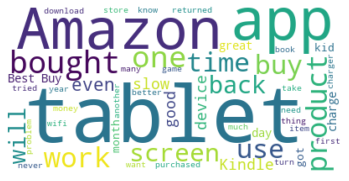


Word Cloud for Rating 2


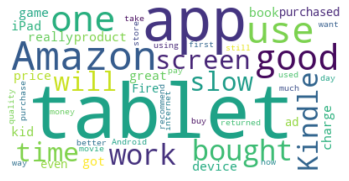


Word Cloud for Rating 3


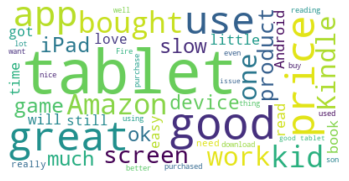


Word Cloud for Rating 4


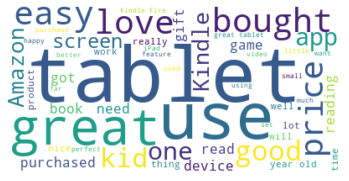


Word Cloud for Rating 5


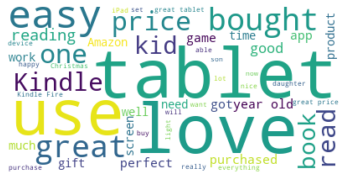

In [15]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["Subject","re","fw","fwd"])

print("Word Cloud for Rating 1")

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_1)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("\nWord Cloud for Rating 2")

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_2)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("\nWord Cloud for Rating 3")
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_3)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("\nWord Cloud for Rating 4")

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_4)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
     
print("\nWord Cloud for Rating 5")
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_5)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Preprocessing Pipeline

In [16]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

Splitting data for building model and validation of prediction

In [17]:
# Remove records with blank values
df_1 = df.dropna()
df_1.shape , df.shape

((19971, 4), (20000, 4))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df["reviews.text"], df["reviews.rating"],random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((16000,), (4000,), (16000,))

Fit Classifier on the training data

In [ ]:
model = clf.fit(X_train,y_train)

In [ ]:
print("Accuracy of Naive Bayes Classifier is {}".format(model.score(X_test,y_test)))

Predict on Test Data

In [ ]:
y_predicted = model.predict(X_test)
y_predicted[0:10]

In [ ]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
#cnf_matrix

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5],
                      title='Confusion matrix, without normalization')
#With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [1,2,3,4,5] ,normalize=True,title='Normalized confusion matrix')

plt.show()

Classifer using Random Forest

In [ ]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(n_jobs= -1)),
    ])

model = clf.fit(X_train,y_train)
print("Accuracy of Random Forest Classifier is {}".format(model.score(X_test,y_test)))

In [ ]:
#Observation: Lift in accuracies observed across categories using Random Forest

In [ ]:
y_predicted = model.predict(X_test)
y_predicted[0:10]

In [ ]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
#cnf_matrix

In [ ]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5],
                      title='Confusion matrix, without normalization')
#With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [1,2,3,4,5] ,normalize=True,title='Normalized confusion matrix')

plt.show()